**0. Importar todos los módulos necesarios**

In [41]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import time

In [42]:
def mostrarContornos(imagenOriginal, imagenGris, contornos):
    plt.subplot(3,3,1)
    for i, contorno in enumerate(contornos):                      
        ubicacion=cv2.approxPolyDP(contorno, 10, True)
        mascara=np.zeros(imagenGris.shape, np.uint8) 
        nuevaImagen=cv2.drawContours(mascara, [ubicacion], 0, 255, -1) 
        nuevaImagen=cv2.bitwise_and(imagenOriginal, imagenOriginal, mask=mascara)
        plt.subplot(3,3,(i+1))
        plt.imshow(cv2.cvtColor(nuevaImagen, cv2.COLOR_BGR2RGB)) 
        print(f"Cantidad de vértices del contorno {i+1} es {len(ubicacion)}.")
    plt.show()

def mostrarRecortes(imagenOriginal, imagenGris, contornos):
    plt.subplot(3,3,1)
    for i, contorno in enumerate(contornos):                      
        ubicacion=cv2.approxPolyDP(contorno, 10, True)
        mascara=np.zeros(imagenGris.shape, np.uint8)
        nuevaImagen=cv2.drawContours(mascara, [ubicacion], 0, 255, -1) 
        nuevaImagen=cv2.bitwise_and(imagenOriginal, imagenOriginal, mask=mascara) 
        (x,y)=np.where(mascara==255) 
        (x1,y1)=(np.min(x),np.min(y)) 
        (x2,y2)=(np.max(x),np.max(y)) 
        imagenRecortada=imagenGris[x1:x2+1,y1:y2+1] 
        plt.subplot(3,3,(i+1))
        plt.imshow(cv2.cvtColor(imagenRecortada, cv2.COLOR_BGR2RGB)) 

def intentarLeerPlacas(imagenOriginal, imagenGris, contornos):
    lector = easyocr.Reader(['es'])
    for i, contorno in enumerate(contornos):                      
        ubicacion=cv2.approxPolyDP(contorno, 10, True)
        mascara=np.zeros(imagenGris.shape, np.uint8)
        nuevaImagen=cv2.drawContours(mascara, [ubicacion], 0, 255, -1) 
        nuevaImagen=cv2.bitwise_and(imagenOriginal, imagenOriginal, mask=mascara) 
        (x,y)=np.where(mascara==255) 
        (x1,y1)=(np.min(x),np.min(y)) 
        (x2,y2)=(np.max(x),np.max(y)) 
        imagenRecortada=imagenGris[x1:x2+1,y1:y2+1] 
        try:
            resultado = lector.readtext(imagenRecortada)
            print(f"Lectura exitosa de la info del contorno {i+1}")
            print(resultado)
            texto=[]
            for lista in resultado:
                texto.append(lista[-2])
            print(f"Texto: {texto}")
        except:
            print(f"Error al leer la info del contorno {i+1}")
        print("\n********************\n")

**1. Leer la imagen, escala de grises (Grayscale) y Desenfocar/Nublar (blur)**

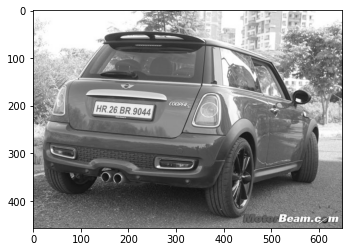

In [43]:
inicio=time.time()
imagen=cv2.imread('image1.jpg') #Se lee la imagen
gris=cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY) #CV2 lee la imagen en código BGR y luego lo pasamos a gris
plt.imshow(cv2.cvtColor(gris, cv2.COLOR_BGR2RGB)) #Se transforma la imagen a formato RGB ya que es el formato esperado por matplotlib y se muestra

**2. Aplicar filtros y encontrar bordes para localizar la información importante**

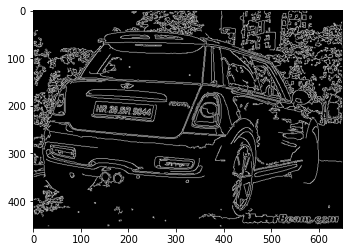

In [44]:
filtradoBilateral=cv2.bilateralFilter(gris, 11, 17, 17) #Reducción de ruido en la imagen
imagenBordeada=cv2.Canny(filtradoBilateral, 30, 200) #Detectar bordes en la imagen con el algoritmo Canny
plt.imshow(cv2.cvtColor(imagenBordeada, cv2.COLOR_BGR2RGB)) #Se muestra la imagen sin ruido y con solo sus bordes

**3. Encontrar contornos y aplicar máscara**

In [47]:
puntosClave=cv2.findContours(imagenBordeada.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #Encontramos los contornos.
contornos=imutils.grab_contours(puntosClave) #Se obtienen los contornos de la imagen.
contornos=sorted(contornos, key=cv2.contourArea, reverse=True)[:9] #Se toma los contornos más grandes.

C:\Users\thomy\AppData\Local\Temp\ipykernel_15988\341994239.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,3,(i+1))


Cantidad de vértices del contorno 1 es 114.
Cantidad de vértices del contorno 2 es 12.
Cantidad de vértices del contorno 3 es 13.
Cantidad de vértices del contorno 4 es 7.
Cantidad de vértices del contorno 5 es 4.
Cantidad de vértices del contorno 6 es 4.
Cantidad de vértices del contorno 7 es 3.
Cantidad de vértices del contorno 8 es 8.
Cantidad de vértices del contorno 9 es 3.


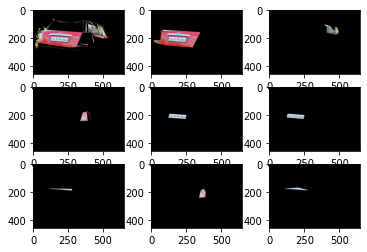

In [48]:
mostrarContornos(imagen, gris, contornos)

C:\Users\thomy\AppData\Local\Temp\ipykernel_15988\341994239.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,3,(i+1))


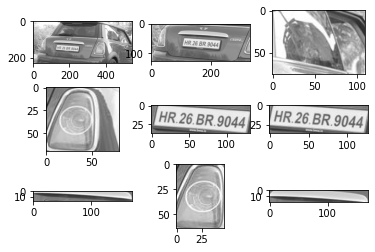

In [49]:
mostrarRecortes(imagen, gris, contornos)

**4. Usar EasyOCR para leer el texto y separar el resultado**

In [50]:
intentarLeerPlacas(imagen, gris, contornos)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\Users\thomy\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
c:\Users\thomy\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\thomy\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Error al leer la info del contorno 1

********************

Error al leer la info del contorno 2

********************

Error al leer la info del contorno 3

********************

Lectura exitosa de la info del contorno 4
[]
Texto: []

********************

Error al leer la info del contorno 5

********************

Lectura exitosa de la info del contorno 6
[([[2, 4], [126, 4], [126, 34], [2, 34]], 'HR.26 BR 9044', 0.6683795903982052)]
Texto: ['HR.26 BR 9044']

********************

Error al leer la info del contorno 7

********************

Error al leer la info del contorno 8

********************

Lectura exitosa de la info del contorno 9
[]
Texto: []

********************



In [ ]:
fin=time.time()
print(f"El tiempo transcurrido durante la ejecución fue de: {fin-inicio} segundos.")

El tiempo transcurrido durante la ejecución fue de: 5.686279058456421 segundos.
